# Bandit Problem

In [3]:
class Bandit:
    def __init__(self, mean=0, stddev=1):
        self.__mean = mean
        self.__stddev = stddev

    '''This method simulates pulling the lever of the bandit and returns the reward'''
    def pullLever(self):
        return np.random.normal(self.__mean, self.__stddev)

In [4]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [5]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [6]:
bandits[0].pullLever()

-0.28785987280244396

## Greedy algorithm Implementation

In [7]:
def run_greedy():
    average=np.zeros(n)
    trials=np.zeros(n)
    rewards=[]

    for _ in range(times):
        chosenLever=np.argmax(average)
        reward=bandits[chosenLever].pullLever()
        rewards.append(reward)
        trials[chosenLever]+=1
        average[chosenLever]=average[chosenLever]+(reward-average[chosenLever])/trials[chosenLever]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

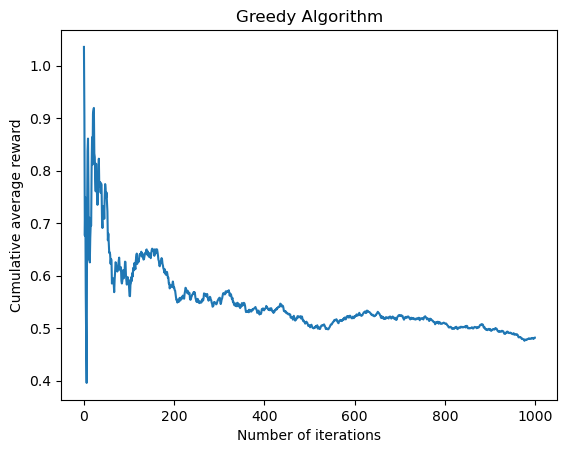

In [8]:
import numpy as np
import matplotlib.pyplot as plt
n=len(bandits)
times=1000
rewards=run_greedy()
cumul_avg=[]
sum=0
for i in range(len(rewards)):
  sum+=rewards[i]
  cumul_avg.append(sum/(i+1))
plt.plot(cumul_avg)
plt.xlabel("Number of iterations")
plt.ylabel("Cumulative average reward")
plt.title("Greedy Algorithm")
plt.show()

## $\epsilon$-greedy Algorithm

In [9]:
def run_epsilon_greedy(epsilon):
  n=len(bandits)
  average=np.zeros(n)
  trials=np.zeros(n)
  rewards=[]
  for _ in range(times):
      x=random.random()
      if x<epsilon:
          chosenLever=random.randrange(n)
      else:
          chosenLever=np.argmax(average)
      reward=bandits[chosenLever].pullLever()
      rewards.append(reward)
      trials[chosenLever]+=1
      average[chosenLever]+=(reward-average[chosenLever])/trials[chosenLever]
  return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

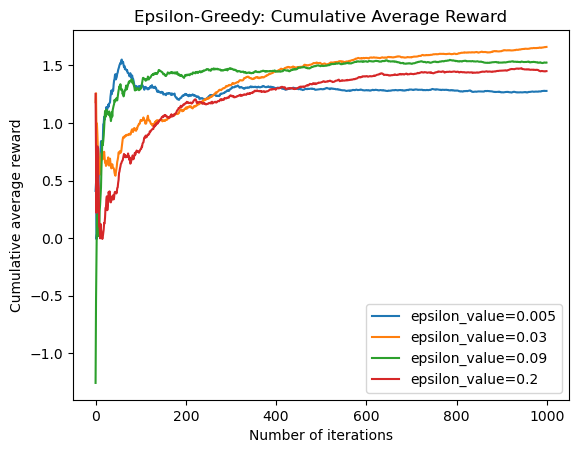

In [10]:
epsilons=[0.005, 0.03, 0.09, 0.2]
for epsilon in epsilons:
    rewards=run_epsilon_greedy(epsilon)
    cumul_avg=[]
    sum=0
    for i in range(len(rewards)):
        sum+=rewards[i]
        cumul_avg.append(sum/(i+1))
    plt.plot(cumul_avg, label=f"epsilon_value={epsilon}")
plt.xlabel("Number of iterations")
plt.ylabel("Cumulative average reward")
plt.title("Epsilon-Greedy: Cumulative Average Reward")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

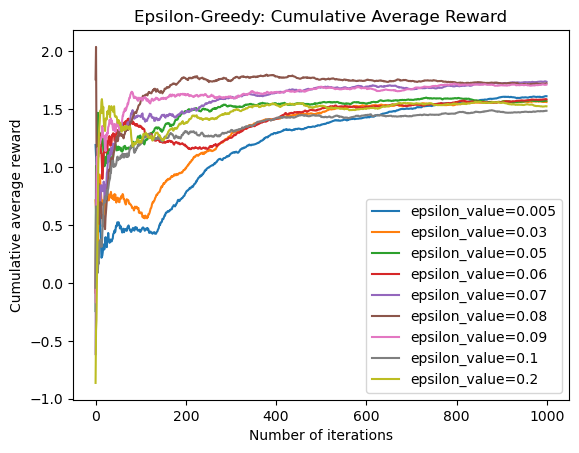

In [11]:
epsilons=[0.005, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2]
for epsilon in epsilons:
    rewards=run_epsilon_greedy(epsilon)
    cumul_avg=[]
    sum=0
    for i in range(len(rewards)):
        sum+=rewards[i]
        cumul_avg.append(sum/(i+1))
    plt.plot(cumul_avg, label=f"epsilon_value={epsilon}")
plt.xlabel("Number of iterations")
plt.ylabel("Cumulative average reward")
plt.title("Epsilon-Greedy: Cumulative Average Reward")
plt.legend()
plt.show()

Optimal value of epsilon is 0.05

## Optimistic Initial Values

In [12]:
def run_optimistic_greedy():
    average=np.ones(n)*value
    trials=np.zeros(n)
    rewards=[]

    for _ in range(times):
        chosenLever=np.argmax(average)
        reward=bandits[chosenLever].pullLever()
        rewards.append(reward)
        trials[chosenLever]+=1
        average[chosenLever]=average[chosenLever]+(reward-average[chosenLever])/trials[chosenLever]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

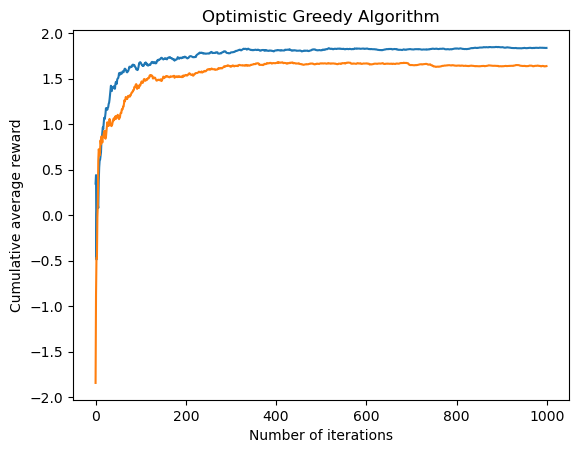

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n=len(bandits)
times=1000
value = 10
rewards=run_optimistic_greedy()
cumul_avg=[]
sum=0
for i in range(len(rewards)):
  sum+=rewards[i]
  cumul_avg.append(sum/(i+1))
rewards_epsilon=run_epsilon_greedy(0.1)
cumul_avg_e=[]
sum_e=0
for i in range(len(rewards_epsilon)):
     sum_e+=rewards_epsilon[i]
     cumul_avg_e.append(sum_e/(i+1))
plt.plot(cumul_avg)
plt.plot(cumul_avg_e)
plt.xlabel("Number of iterations")
plt.ylabel("Cumulative average reward")
plt.title("Optimistic Greedy Algorithm")
plt.show()

## Optimistic algorithm is better

## Upper Confidence Bound (UCB)

In [16]:
import math
def run_ucb(c):
    n=len(bandits)
    average=np.zeros(n)
    trials=np.zeros(n)
    rewards=[]
    terms = []
    for i in range(n):
        terms.append(float('inf'))
    for t in range(times):
        chosenLever = np.argmax(terms)
        reward=bandits[chosenLever].pullLever()
        rewards.append(reward)
        trials[chosenLever]+=1
        average[chosenLever]=average[chosenLever]+(reward-average[chosenLever])/trials[chosenLever]
        terms[chosenLever] = average[chosenLever]+c*(math.log(t+1)/trials[chosenLever])**(1/2)
    return rewards
    pass

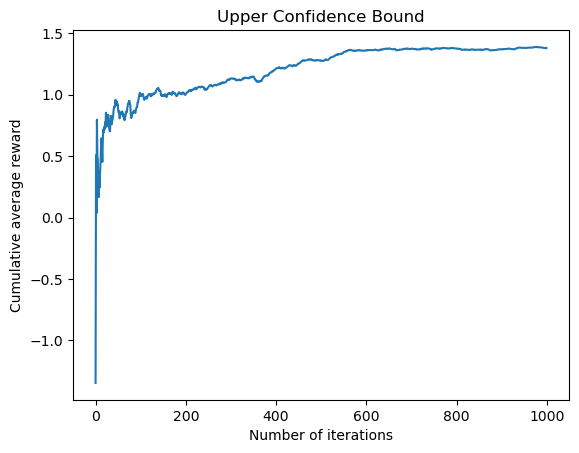

In [18]:
rewards=run_ucb(5)
cumul_avg=[]
sum=0
for i in range(len(rewards)):
  sum+=rewards[i]
  cumul_avg.append(sum/(i+1))
plt.plot(cumul_avg)
plt.xlabel("Number of iterations")
plt.ylabel("Cumulative average reward")
plt.title("Upper Confidence Bound")
plt.show()